In [1]:
# Import Required Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## __Get Data__

In [5]:
cars = pd.read_csv('final_cars.csv')

all_scores = {} # To store scores from different models

In [6]:
# Create X and Y
X = cars.drop(columns=['price'])
y = cars['price']

In [7]:
X.shape,y.shape

((199, 63), (199,))

### __Create Test and Train Data Sets__

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=99)

# __Linear Regression Model__

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.intercept_

-45276.71598586992

### __Calculate accuracy with train data__

In [11]:
y_pred = model.predict(X_train)
print('MSE :',mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train,y_pred)))

MSE : 2653168.940599955
RMSE: 1628.8551011676745


In [12]:
r2score = r2_score(y_train,y_pred)
print(f'R2 Score:{r2score:0.2f}')

R2 Score:0.96


### __Test with test data__

In [13]:
y_pred = model.predict(X_test)

In [14]:
## get MSE
mse = mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error : {mse:0.2f}')

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Root Mean Squared Error : {rmse:0.2f}')

mae = mean_absolute_error(y_test,y_pred)
print(f'Mean Absolute Error : {mae:0.2f}')

r2score = r2_score(y_test,y_pred)
print(f'R2 Score: {r2score:0.2f}')

all_scores['LogisticRegression'] = r2_score(y_test,y_pred)

Mean Squared Error : 5749087.60
Root Mean Squared Error : 2397.73
Mean Absolute Error : 1650.68
R2 Score: 0.92


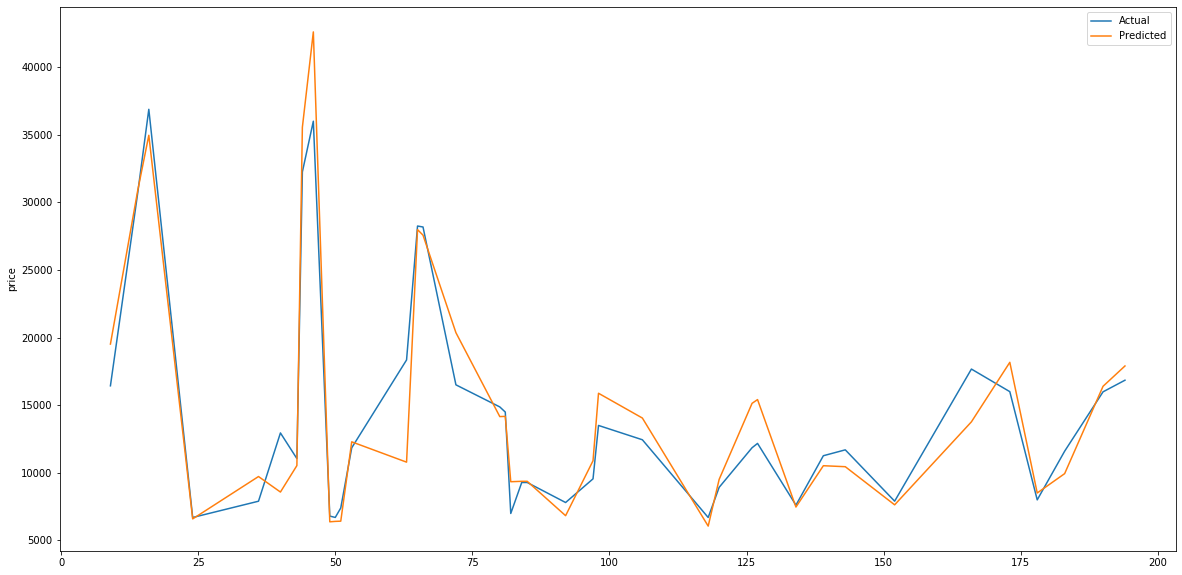

In [15]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot(y = y_test, x = X_test.index , label = 'Actual')
sns.lineplot(y = y_pred,x = X_test.index,label = 'Predicted')

In [16]:
# Checl 
for predict,actual in zip(y_pred,y_test):
    print(f'{actual:6.0f} - {predict:6.0f} - {predict - actual : 6.0f}')

  7799 -   6825 -   -974
  6692 -   6055 -   -637
 15998 -  18168 -   2170
 28248 -  27983 -   -265
 15985 -  16395 -    410
  6795 -   6372 -   -423
 14869 -  14154 -   -715
 28176 -  27572 -   -604
  7603 -   7464 -   -139
 11259 -  10520 -   -739
  7895 -   9721 -   1826
 36000 -  42605 -   6605
 17669 -  13766 -  -3903
 12945 -   8573 -  -4372
  7995 -   8503 -    508
 16845 -  17898 -   1053
  6692 -   6587 -   -105
  7898 -   7628 -   -270
 16430 -  19518 -   3088
 12170 -  15412 -   3242
  8921 -   9510 -    589
 11048 -  10530 -   -518
 14489 -  14170 -   -319
  6695 -   6403 -   -292
 18344 -  10784 -  -7560
  7395 -   6419 -   -976
 32250 -  35550 -   3300
  9279 -   9368 -     89
 13499 -  15879 -   2380
 11694 -  10447 -  -1247
  6989 -   9337 -   2348
 30760 -  30926 -    166
  9279 -   9368 -     89
 11595 -   9935 -  -1660
 12440 -  14046 -   1606
  9549 -  10887 -   1338
 16503 -  20361 -   3858
 11850 -  15134 -   3284
 36880 -  34959 -  -1921
 11845 -  12287 -    442


### __Model with Normalization__

In [17]:
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [18]:
y_pred = model.predict(X_test)

In [19]:
## get MSE
mse = mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error : {mse:0.2f}')

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Root Mean Squared Error : {rmse:0.2f}')

mae = mean_absolute_error(y_test,y_pred)
print(f'Mean Absolute Error : {mae:0.2f}')

r2score = r2_score(y_test,y_pred)
print(f'R2 Score: {r2score:0.2f}')

all_scores['Linear Regression(Normalization)'] = r2_score(y_test,y_pred)

Mean Squared Error : 5035684.13
Root Mean Squared Error : 2244.03
Mean Absolute Error : 1566.14
R2 Score: 0.93


### __Micro Model with 2 features__

In [20]:
# Micro model
X_micro = X[['engine-size','highway-mpg']]
y_micro = y

In [21]:
X_micro_train, X_micro_test, y_micro_train, y_micro_test = train_test_split(X_micro,y_micro,test_size=0.2,random_state = 0)                                                                            

In [22]:
micro_model = LinearRegression(normalize=True)
micro_model.fit(X_micro_train,y_micro_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [23]:
micro_model.score(X_micro_train,y_micro_train) # r2score for train data

0.7714586772949249

In [24]:
y_micro_pred = micro_model.predict(X_micro_test)

In [25]:
r2score = r2_score(y_micro_test,y_micro_pred)
print(f'R2 Score: {r2score:0.2f}')

R2 Score: 0.84


### __Regularization__

In [26]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

In [27]:
lm = LassoCV(alphas=[0.10,0.5,1.0],cv=5,normalize=True)
lm.fit(X,y)

LassoCV(alphas=[0.1, 0.5, 1.0], copy_X=True, cv=5, eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=True, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [28]:
y_pred = lm.predict(X_test)

In [29]:
r2score = r2_score(y_test,y_pred)
print(f'R2 Score: {r2score:0.2f}')

R2 Score: 0.97


In [30]:
## get MSE
mse = mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error : {mse:0.2f}')

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Root Mean Squared Error : {rmse:0.2f}')

mae = mean_absolute_error(y_test,y_pred)
print(f'Mean Absolute Error : {mae:0.2f}')

r2score = r2_score(y_test,y_pred)
print(f'R2 Score: {r2score:0.2f}')


all_scores['Regularization(Lasso CV)'] = r2_score(y_test,y_pred)

Mean Squared Error : 2176007.06
Root Mean Squared Error : 1475.13
Mean Absolute Error : 1016.33
R2 Score: 0.97


## __RandomForestRegresser__

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
print('Train Data Score : ',model.score(X_train,y_train))
print('Test Data Score :',model.score(X_test,y_test))
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'R2 Score:{r2score:0.2f}')

Train Data Score :  0.9891600497632473
Test Data Score : 0.9122047021379593
R2 Score:0.91


In [33]:
## get MSE
mse = mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error : {mse:0.2f}')

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Root Mean Squared Error : {rmse:0.2f}')

mae = mean_absolute_error(y_test,y_pred)
print(f'Mean Absolute Error : {mae:0.2f}')

r2score = r2_score(y_test,y_pred)
print(f'R2 Score: {r2score:0.2f}')


all_scores['RandomForestRegressor'] = r2_score(y_test,y_pred)

Mean Squared Error : 5944227.61
Root Mean Squared Error : 2438.08
Mean Absolute Error : 1753.67
R2 Score: 0.91


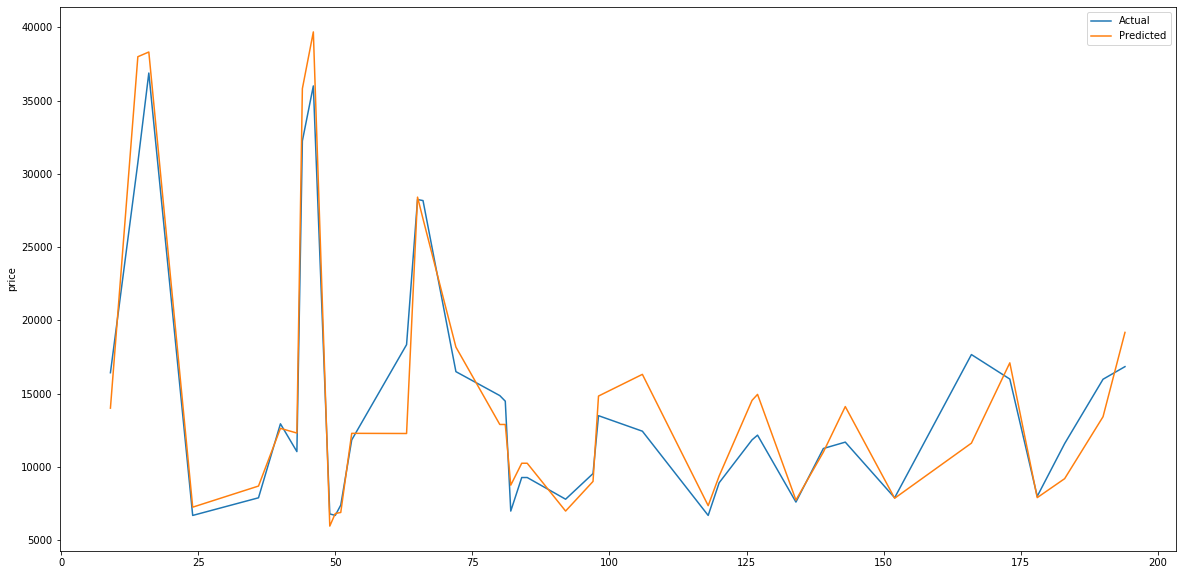

In [34]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot(y = y_test, x = X_test.index , label = 'Actual')
sns.lineplot(y = y_pred,x = X_test.index,label = 'Predicted')

## __SGDRegressor__

In [35]:
from sklearn.linear_model import SGDRegressor

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
# Use same scale for X_train and X_test
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
model = SGDRegressor(random_state=100, penalty='l1',)
model.fit(X_train, y_train)
print(f'Train score:{model.score(X_train,y_train)}')

Train score:0.9525496272155731


In [40]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score:{r2score:0.2f}')

all_scores['SGDRegressor'] = r2_score(y_test,y_pred)

Test Score:0.95


In [41]:
mse = mean_squared_error(y_test,y_pred)
print('MSE :',mse)
print('RMSE :',np.sqrt(mse))

MSE : 3357086.5970198014
RMSE : 1832.2354098258775


In [42]:
all_scores

{'LogisticRegression': 0.9150868890793251,
 'Linear Regression(Normalization)': 0.9256237450281413,
 'Regularization(Lasso CV)': 0.9678607212583333,
 'RandomForestRegressor': 0.9122047021379593,
 'SGDRegressor': 0.9493632297463853}

## __From all the above analysis the best performance is given by Regularization.__